In [1]:
from pathlib import Path
import time
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

# Import shishin directly to avoid import issues
import sys
sys.path.insert(0, str(Path.cwd().parent))

# Import shishin functions
from DiagnosisForth.converters.obabel import convert_pdbqt_to_sdf
from DiagnosisForth.converters.bp import create_protein_ligand_complex
from DiagnosisForth.interactions.analyzer import analyze_protein_ligand_interactions, interactions_to_dataframe
from DiagnosisForth.viewers.utils import visualize_protein_ligand_interactions

In [2]:
# Setup working directory and convert PDBQT files to SDF format
base_work_dir = Path.cwd()
base_work_dir = base_work_dir.resolve()
work_dir = base_work_dir
pdbqt_files = sorted(list((work_dir / 'data').glob("*.pdbqt")))

# Convert all PDBQT files to SDF format using the new function name
for pdbqt_file in pdbqt_files:
    output_sdf = work_dir / 'data' / f"{pdbqt_file.stem}.sdf"
    convert_pdbqt_to_sdf(str(pdbqt_file), str(output_sdf))

6 molecules converted


In [3]:
# Create protein-ligand complex using new function names
ligand_path = work_dir / 'data' / "ligand_0_0-0_out.sdf"  # @param {type: "string"}
protein_path = work_dir / 'data' / "5ndd_sligkv_lig9_frame_95_alignto_opm.pdb"  # @param {type: "string"}
complex_path = work_dir / 'data' / "complex.pdb"  # @param {type: "string"}

# Create complex using the new function name
create_protein_ligand_complex(
    ligand_path=str(ligand_path),
    protein_path=str(protein_path),
    output_path=str(complex_path)
)

Done! Complex saved to /Users/yuzotakagi/dev/drug/shishin/examples/data/complex.pdb


In [4]:
# Analyze protein-ligand interactions using new function name
interactions_by_site = analyze_protein_ligand_interactions(str(complex_path))

# Select the first binding site
index_of_selected_site = 0
selected_site = list(interactions_by_site.keys())[index_of_selected_site]
print(f"Selected binding site: {selected_site}")

Selected binding site: UNL:Z:1


In [5]:
# Convert interactions to DataFrame for hydrogen bonds
hbond_df = interactions_to_dataframe(
    binding_site=interactions_by_site[selected_site], 
    interaction_type="hbond"
)

# Display the hydrogen bond interactions
print("Hydrogen bond interactions:")
hbond_df

Hydrogen bond interactions:


,RESNR,RESTYPE,RESCHAIN,RESNR_LIG,RESTYPE_LIG,RESCHAIN_LIG,SIDECHAIN,DIST_H-A,DIST_D-A,DON_ANGLE,PROTISDON,DONORIDX,DONORTYPE,ACCEPTORIDX,ACCEPTORTYPE,LIGCOO,PROTCOO
0,326,TYR,1,1,UNL,Z,True,2.59,3.45,147.99,True,5919,O3,6465,N2,"(4.836, -1.373, 15.012)","(3.284, -4.409, 14.516)"
1,156,TYR,1,1,UNL,Z,True,3.48,3.91,109.17,True,1585,O3,6461,O2,"(3.901, 2.487, 15.662)","(1.735, -0.143, 13.746)"
2,227,HIS,1,1,UNL,Z,True,3.27,3.67,106.82,True,2741,Npl,6461,O2,"(3.901, 2.487, 15.662)","(0.789, 0.621, 16.236)"
3,227,HIS,1,1,UNL,Z,False,2.99,3.85,140.69,False,6463,Nam,2736,O2,"(3.641, 0.294, 16.195)","(2.713, 1.0, 19.869)"


In [6]:
# Visualize protein-ligand interactions in 3D using new function name
view, interaction_tables = visualize_protein_ligand_interactions(
    pdb_file_path=str(complex_path),
    width=800,
    height=600
)

# Display the 3D visualization
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Interaction summary:
  hydrophobic: 6 interactions
  hbond: 4 interactions
  waterbridge: 0 interactions
  saltbridge: 0 interactions
  pistacking: 1 interactions
  pication: 1 interactions
  halogen: 0 interactions


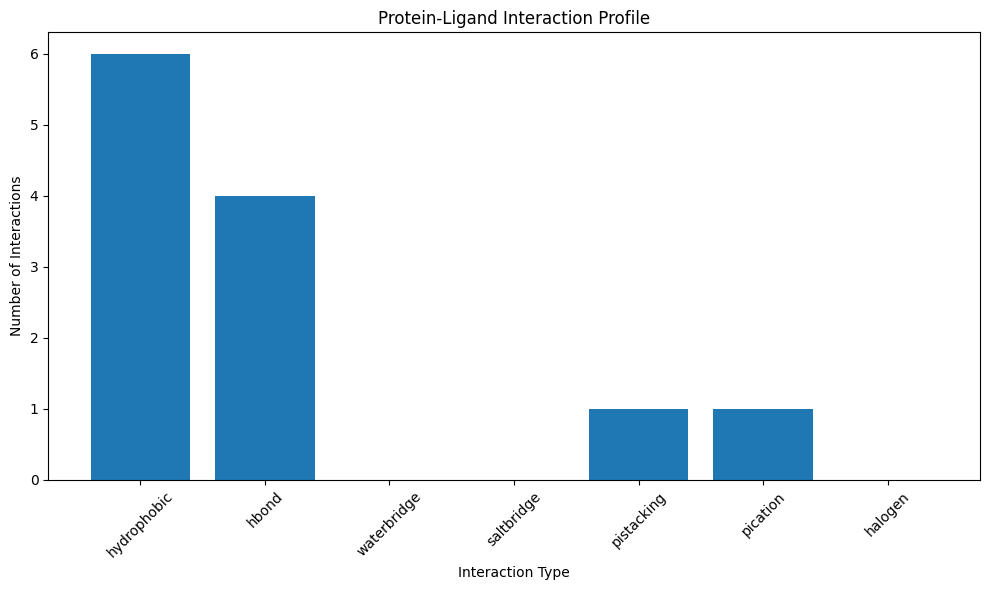

In [7]:
# Analyze different types of interactions
interaction_types = ["hydrophobic", "hbond", "waterbridge", "saltbridge", "pistacking", "pication", "halogen"]

# Create a summary of all interactions
interaction_summary = {}
for interaction_type in interaction_types:
    df = interactions_to_dataframe(
        binding_site=interactions_by_site[selected_site], 
        interaction_type=interaction_type
    )
    interaction_summary[interaction_type] = len(df)
    
# Display summary
print("Interaction summary:")
for itype, count in interaction_summary.items():
    print(f"  {itype}: {count} interactions")

# Plot interaction counts
plt.figure(figsize=(10, 6))
plt.bar(interaction_summary.keys(), interaction_summary.values())
plt.xlabel('Interaction Type')
plt.ylabel('Number of Interactions')
plt.title('Protein-Ligand Interaction Profile')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()